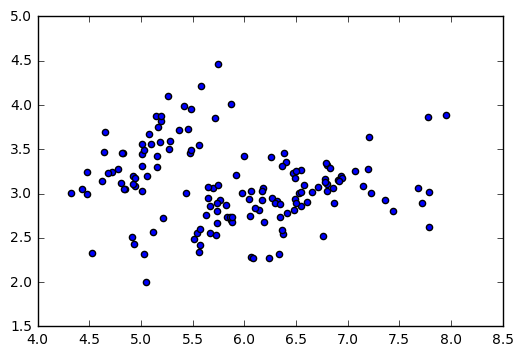

In [5]:
#(1)
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
X=np.genfromtxt("data/iris.txt");
#1(a)
X=X[:,0:2]
plt.scatter(X[:,0],X[:,1])
plt.show()

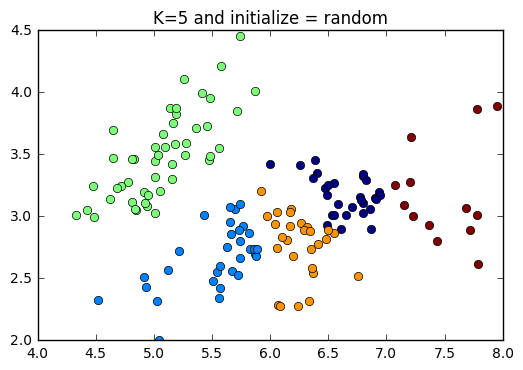

score on random initialize 25.1922630429


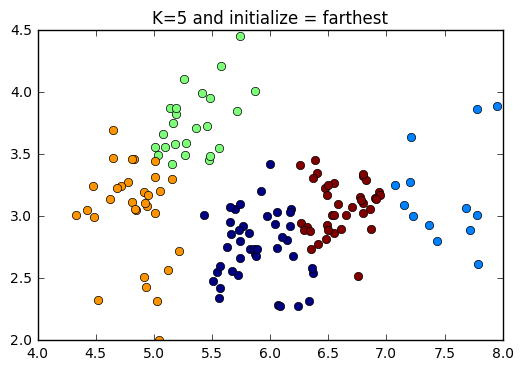

score on farthest initialize 20.9546301963


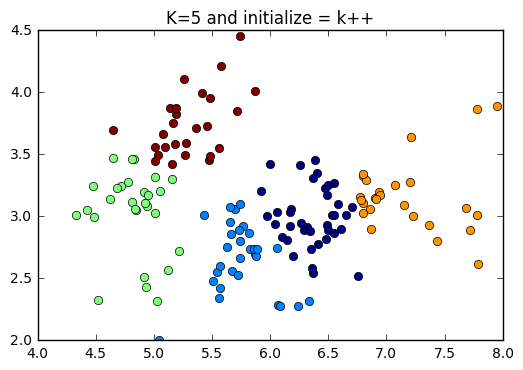

score on k++ initialize 21.568842808


In [69]:
#1(b)
#for initialization random k=5
Z,C,sumd=ml.cluster.kmeans(X,5,init='random')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and initialize = random")
plt.show()
print "score on random initialize "+str(sumd)
#for initialization farthest k=5
Z,C,sumd=ml.cluster.kmeans(X,5,init='farthest')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and initialize = farthest")
plt.show()
print "score on farthest initialize "+str(sumd)
#for initialization k++ k=5
Z,C,sumd=ml.cluster.kmeans(X,5,init='k++')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and initialize = k++")
plt.show()
print "score on k++ initialize "+str(sumd)

We can see from the above plots that  farthest initializations has the best score for K=5

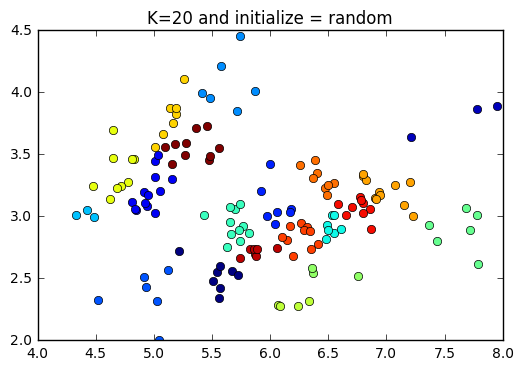

score on random initialize 4.47155696125


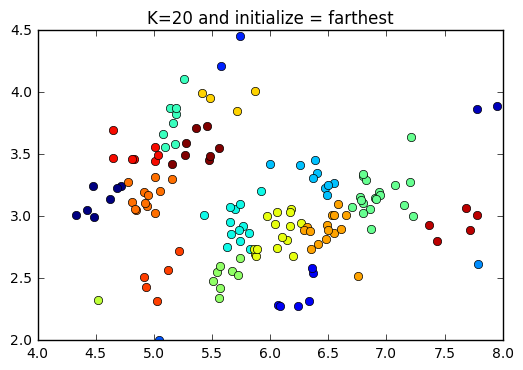

score on farthest initialize 4.7042590547


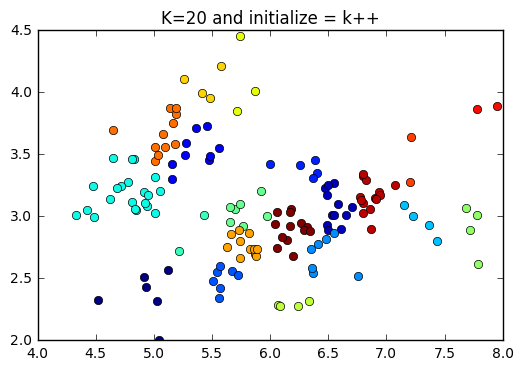

score on k++ initialize 4.79518764341


In [70]:
#for initialization random k=20
Z,C,sumd=ml.cluster.kmeans(X,20,init='random')
ml.plotClassify2D(None,X,Z);
plt.title("K=20 and initialize = random")
plt.show()
print "score on random initialize "+str(sumd)
#for initialization farthest k=20
Z,C,sumd=ml.cluster.kmeans(X,20,init='farthest')
ml.plotClassify2D(None,X,Z);
plt.title("K=20 and initialize = farthest")
plt.show()
print "score on farthest initialize "+str(sumd)
#for initialization k++ k=20
Z,C,sumd=ml.cluster.kmeans(X,20,init='k++')
ml.plotClassify2D(None,X,Z);
plt.title("K=20 and initialize = k++")
plt.show()
print "score on k++ initialize "+str(sumd)

We can see from the above plots that  random initializations has the best score for K=20

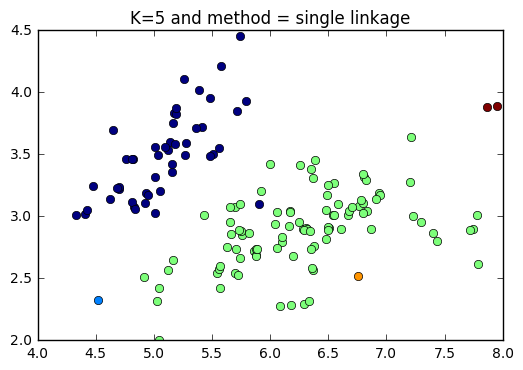

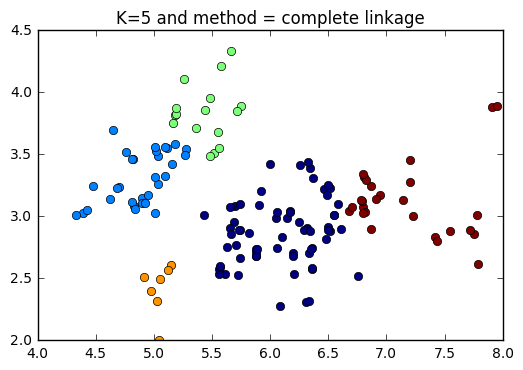

In [32]:
#1(c)for agglomerative clustering and k=5
#single linkage
Z,_=ml.cluster.agglomerative(X,5,method='min')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and method = single linkage")
plt.show()
#complete linkage
Z,_=ml.cluster.agglomerative(X,5,method='max')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and method = complete linkage")
plt.show()

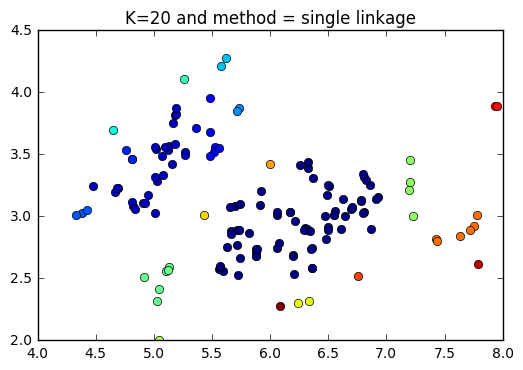

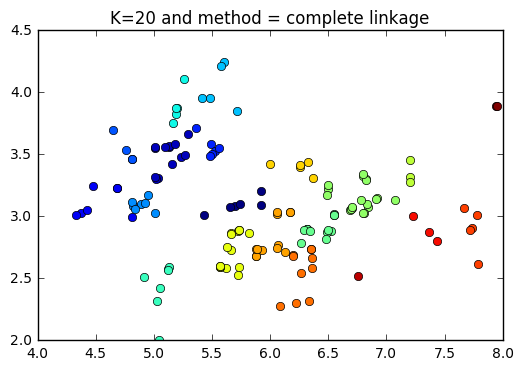

In [33]:
#1(c)for agglomerative clustering and k=20
#single linkage
Z,_=ml.cluster.agglomerative(X,20,method='min')
ml.plotClassify2D(None,X,Z);
plt.title("K=20 and method = single linkage")
plt.show()
#complete linkage
Z,_=ml.cluster.agglomerative(X,20,method='max')
ml.plotClassify2D(None,X,Z);
plt.title("K=20 and method = complete linkage")
plt.show()

We can see from the above plots that a case of data which looks like strips, the single linkage clustering is good whereas the complete linkage clustering is good for more 'spherical clusters'.  kmenas clustering is a good way of clustering because of its low computational complexity. 

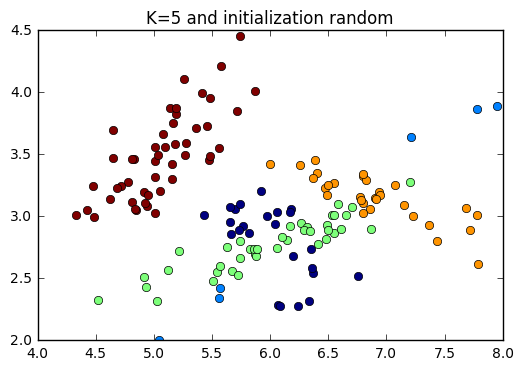

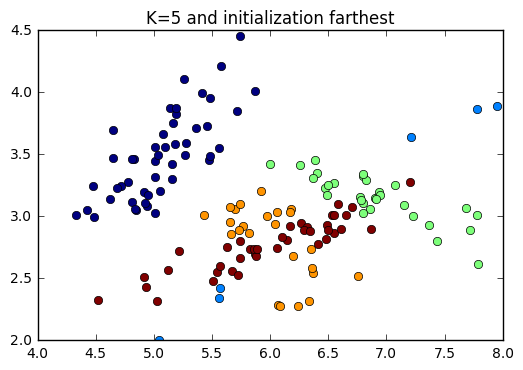

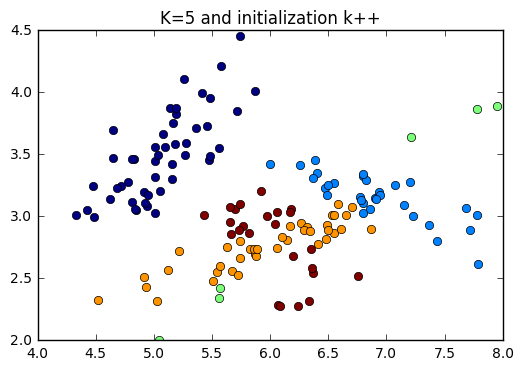

In [71]:
#1(d)
#k =5. EM Gaussian mixture model

#for initialization random
Z,_,_,_=ml.cluster.gmmEM(X,5,init='random')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and initialization random")
plt.show()

#for initialization farthest
Z,_,_,_=ml.cluster.gmmEM(X,5,init='farthest')
ml.plotClassify2D(None,X,Z);
plt.title("K=5 and initialization farthest")
plt.show()

#for initialization k++
Z,_,_,_=ml.cluster.gmmEM(X,5,init='k++')
plt.title("K=5 and initialization k++")
ml.plotClassify2D(None,X,Z);
plt.show()

EM Gaussian mixture models are well suited for dataset where a data might not be strictly associated with any cluster rather than it forms clusters which are overlapping. 

4916
576


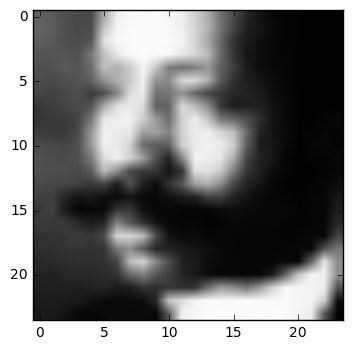

In [11]:
#(2)
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
print X.shape[0]
print X.shape[1]
plt.figure()
img = np.reshape(X[0,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint


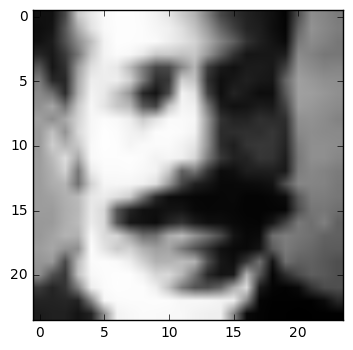

In [12]:
img = np.reshape(X[1,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

In [7]:
#2(a)
mean = np.mean(X,axis=0);
print mean.shape[0]
X_mean = X -mean

576


In [8]:
#2(b)
from scipy import linalg as alg

U, S, Vh = alg.svd(X_mean,full_matrices=False)
print U.shape
print S.shape
print Vh.shape
W = U.dot( np.diag(S) )


(4916L, 576L)
(576L,)
(576L, 576L)


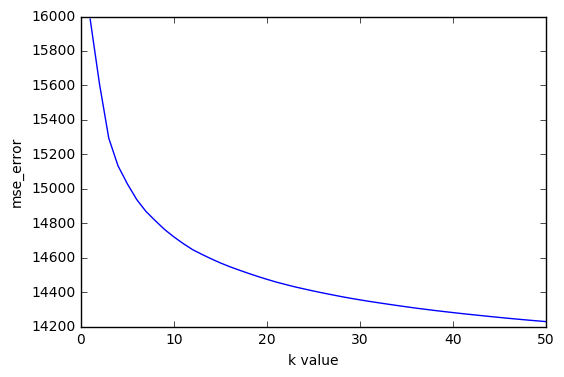

In [9]:
#2(c)
mse_errors=[]
for k in range(1,51):
    X_hat=W[:,:k].dot(Vh[:k,:])
    mse_error = np.mean((X-X_hat)**2)
    mse_errors.append(mse_error)
plt.plot(range(1,51),mse_errors)
plt.xlabel("k value")
plt.ylabel("mse_error")
plt.show();

In [54]:
print W.shape

(4916L, 576L)


1041.29423985
618.461443214
487.369510501


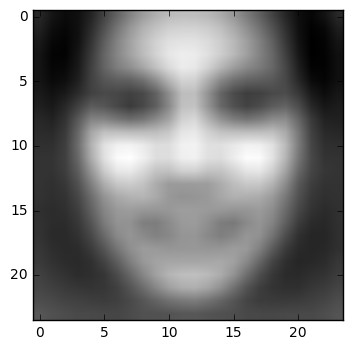

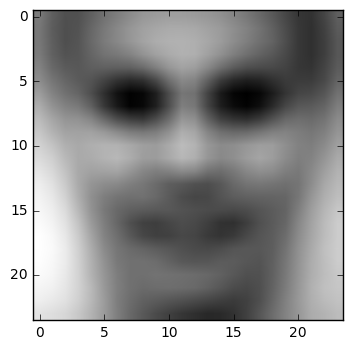

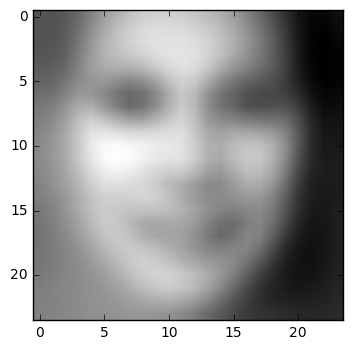

In [56]:
#2(d) u+alpha
scale_factor_1 = 2*np.median(np.abs(W[:,0]))
scale_factor_2 = 2*np.median(np.abs(W[:,1]))
scale_factor_3 = 2*np.median(np.abs(W[:,2]))
print scale_factor_1
temp1 = mean+ scale_factor_1*Vh[0,:]
plt.figure()
img = np.reshape(temp1,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

print scale_factor_2
temp2 = mean+ scale_factor_2*Vh[1,:]
plt.figure()
img = np.reshape(temp2,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

print scale_factor_3
temp3 = mean+ scale_factor_3*Vh[2,:]
plt.figure()
img = np.reshape(temp3,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")


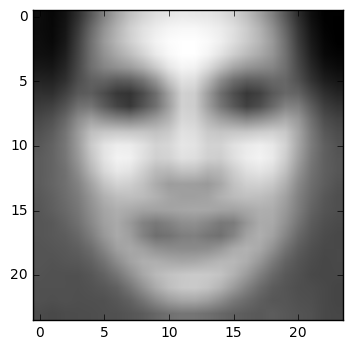

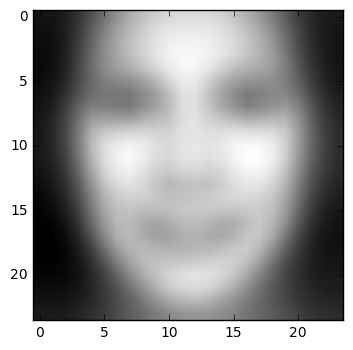

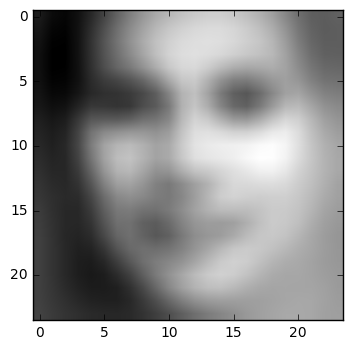

In [57]:
#2(d)u-alpha
temp1 = mean - scale_factor_1*Vh[0,:]
plt.figure()
img = np.reshape(temp1,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

temp2 = mean - scale_factor_2*Vh[1,:]
plt.figure()
img = np.reshape(temp2,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

temp3 = mean - scale_factor_3*Vh[2,:]
plt.figure()
img = np.reshape(temp3,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")


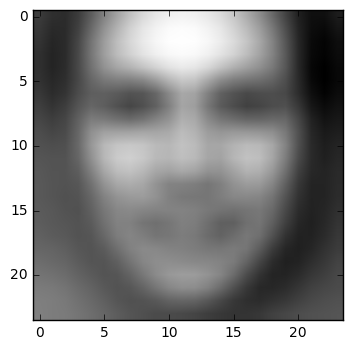

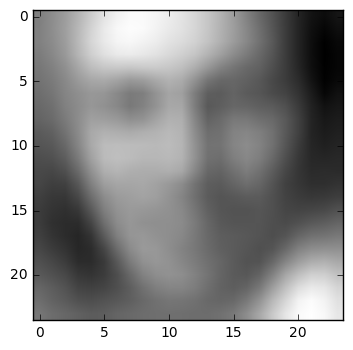

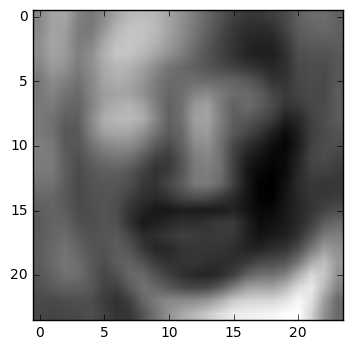

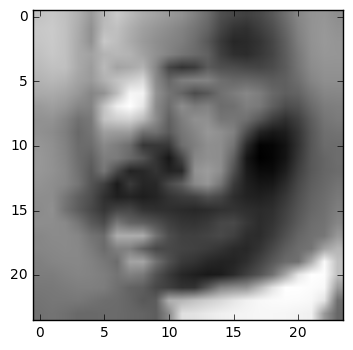

In [63]:
#2(e) face1
#for k=5
temp = mean + scale_factor_1*Vh[:5,:]
reconstruct_image = W[0,:5].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=10
temp = mean + scale_factor_1*Vh[:10,:]
reconstruct_image = W[0,:10].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=50
temp = mean + scale_factor_1*Vh[:50,:]
reconstruct_image = W[0,:50].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=576
temp = mean + scale_factor_1*Vh[:576,:]
reconstruct_image = W[0,:576].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

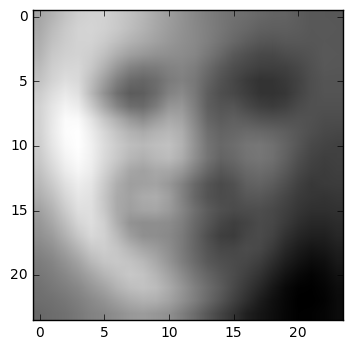

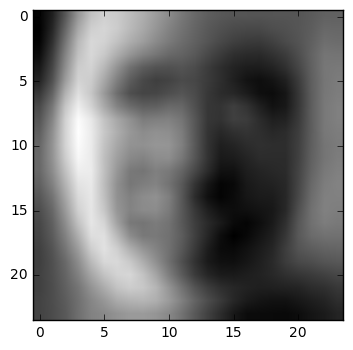

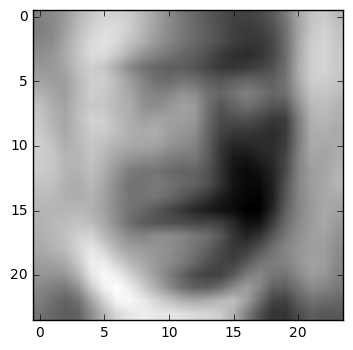

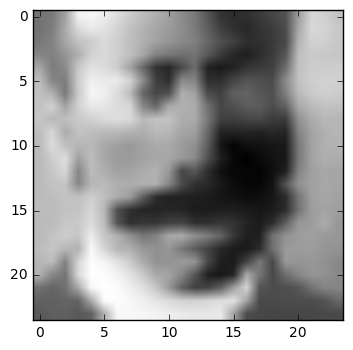

In [65]:
#2(e) face2
#for k=5
temp = mean + scale_factor_1*Vh[:5,:]
reconstruct_image = W[1,:5].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=10
temp = mean + scale_factor_1*Vh[:10,:]
reconstruct_image = W[1,:10].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=50
temp = mean + scale_factor_1*Vh[:50,:]
reconstruct_image = W[1,:50].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

#k=576
temp = mean + scale_factor_1*Vh[:576,:]
reconstruct_image = W[1,:576].dot(temp)
plt.figure()
img = np.reshape(reconstruct_image,(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray")

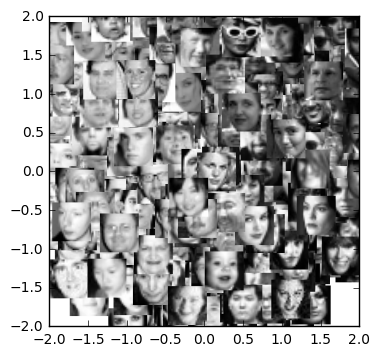

In [15]:
#2(f)
idx = [15,16,17,18,19,20,21,22,23,24,25] # pick some data at random or otherwise; get list / vector of integer indices
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
for i in range(1,1000):
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5) # where to place the image & size
    img = np.reshape( X[i,:], (24,24) )
    #print loc
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to reasonable visual scale

we can see they are organised as their property of pca 1 nd 2